In [959]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import plotly
import plotly.express as px
import plotly.graph_objs as go
from plotly.offline import init_notebook_mode, plot, iplot
from plotly import tools
from warnings import filterwarnings
filterwarnings('ignore')

Loading datasets - match details and ball by ball deliveries

In [960]:
del_data = pd.read_csv('IPL_Ball_by_Ball_2008_2022.csv')
mat_data = pd.read_csv('IPL_Matches_2008_2022.csv')
print("Datasets are loaded")

Datasets are loaded


Data Inspection

1. IPL_Ball_by_Ball_2008_2022.csv

In [961]:
del_data.shape

(225485, 17)

In [962]:
df_dub = del_data.copy()
df_dub.shape

(225485, 17)

In [963]:
# Checking for duplicates and dropping the entire duplicate row if any
df_dub.drop_duplicates(subset=None, inplace=True)

In [964]:
df_dub.shape

(225485, 17)

The shape after running the drop duplicate command is same as the original dataframe.

Hence we can conclude that there were zero duplicate values in the dataset.

In [965]:
del_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 225485 entries, 0 to 225484
Data columns (total 17 columns):
 #   Column             Non-Null Count   Dtype 
---  ------             --------------   ----- 
 0   ID                 225485 non-null  int64 
 1   innings            225485 non-null  int64 
 2   overs              225485 non-null  int64 
 3   ballnumber         225485 non-null  int64 
 4   batter             225485 non-null  object
 5   bowler             225485 non-null  object
 6   non-striker        225485 non-null  object
 7   extra_type         12033 non-null   object
 8   batsman_run        225485 non-null  int64 
 9   extras_run         225485 non-null  int64 
 10  total_run          225485 non-null  int64 
 11  non_boundary       225485 non-null  int64 
 12  isWicketDelivery   225485 non-null  int64 
 13  player_out         11128 non-null   object
 14  kind               11128 non-null   object
 15  fielders_involved  7970 non-null    object
 16  BattingTeam        2

In [966]:
del_data.describe()

,ID,innings,overs,ballnumber,batsman_run,extras_run,total_run,non_boundary,isWicketDelivery
count,2.254850e+05,225485.000000,225485.000000,225485.000000,225485.000000,225485.000000,225485.000000,225485.000000,225485.000000
mean,8.310483e+05,1.483890,9.185853,3.619842,1.243648,0.066931,1.310579,0.000093,0.049351
std,3.375946e+05,0.503111,5.682081,1.810689,1.618172,0.341379,1.606020,0.009650,0.216601
min,3.359820e+05,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,5.012610e+05,1.000000,4.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,8.297350e+05,1.000000,9.000000,4.000000,1.000000,0.000000,1.000000,0.000000,0.000000
75%,1.178393e+06,2.000000,14.000000,5.000000,1.000000,0.000000,1.000000,0.000000,0.000000
max,1.312198e+06,6.000000,19.000000,10.000000,6.000000,7.000000,7.000000,1.000000,1.000000


In [967]:
del_data.head(2)

,ID,innings,overs,ballnumber,batter,bowler,non-striker,extra_type,batsman_run,extras_run,total_run,non_boundary,isWicketDelivery,player_out,kind,fielders_involved,BattingTeam
0,1254117,1,0,1,RD Gaikwad,Shakib Al Hasan,F du Plessis,NaN,1,0,1,0,0,NaN,NaN,NaN,Chennai Super Kings
1,1254117,1,0,2,F du Plessis,Shakib Al Hasan,RD Gaikwad,NaN,0,0,0,0,0,NaN,NaN,NaN,Chennai Super Kings


Data Inspection

2. IPL_Matches_2008_2022.csv

In [968]:
mat_data.shape

(948, 20)

In [969]:
mat_dup = mat_data.copy()
# Checking for duplicates and dropping the entire duplicate row if any
mat_dup.drop_duplicates(subset=None, inplace=True)

mat_dup.shape

(948, 20)

In [970]:
mat_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 948 entries, 0 to 947
Data columns (total 20 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   ID               948 non-null    int64  
 1   City             897 non-null    object 
 2   Date             948 non-null    object 
 3   Season           948 non-null    object 
 4   MatchNumber      948 non-null    object 
 5   Team1            948 non-null    object 
 6   Team2            948 non-null    object 
 7   Venue            948 non-null    object 
 8   TossWinner       948 non-null    object 
 9   TossDecision     948 non-null    object 
 10  SuperOver        944 non-null    object 
 11  WinningTeam      944 non-null    object 
 12  WonBy            948 non-null    object 
 13  Margin           930 non-null    float64
 14  method           19 non-null     object 
 15  Player_of_Match  944 non-null    object 
 16  Team1Players     948 non-null    object 
 17  Team2Players    

In [971]:
mat_data.describe()

,ID,Margin
count,9.480000e+02,930.000000
mean,8.294690e+05,17.078495
std,3.371967e+05,21.651344
min,3.359820e+05,1.000000
25%,5.012608e+05,6.000000
50%,8.297360e+05,8.000000
75%,1.175370e+06,19.000000
max,1.312198e+06,146.000000


In [972]:
mat_data.head(2)

,ID,City,Date,Season,MatchNumber,Team1,Team2,Venue,TossWinner,TossDecision,SuperOver,WinningTeam,WonBy,Margin,method,Player_of_Match,Team1Players,Team2Players,Umpire1,Umpire2
0,1254117,Dubai,15-10-2021,2021,Final,Chennai Super Kings,Kolkata Knight Riders,Dubai International Cricket Stadium,Kolkata Knight Riders,field,N,Chennai Super Kings,Runs,27.0,NaN,F du Plessis,"['RD Gaikwad', 'F du Plessis', 'RV Uthappa', '...","['Shubman Gill', 'VR Iyer', 'N Rana', 'SP Nari...",Nitin Menon,RK Illingworth
1,1254116,Sharjah,13-10-2021,2021,Qualifier 2,Delhi Capitals,Kolkata Knight Riders,Sharjah Cricket Stadium,Kolkata Knight Riders,field,N,Kolkata Knight Riders,Wickets,3.0,NaN,VR Iyer,"['PP Shaw', 'S Dhawan', 'MP Stoinis', 'SS Iyer...","['Shubman Gill', 'VR Iyer', 'N Rana', 'RA Trip...",KN Ananthapadmanabhan,MA Gough


In [973]:
del_data.head(2)

,ID,innings,overs,ballnumber,batter,bowler,non-striker,extra_type,batsman_run,extras_run,total_run,non_boundary,isWicketDelivery,player_out,kind,fielders_involved,BattingTeam
0,1254117,1,0,1,RD Gaikwad,Shakib Al Hasan,F du Plessis,NaN,1,0,1,0,0,NaN,NaN,NaN,Chennai Super Kings
1,1254117,1,0,2,F du Plessis,Shakib Al Hasan,RD Gaikwad,NaN,0,0,0,0,0,NaN,NaN,NaN,Chennai Super Kings


In [974]:
del_data.shape

(225485, 17)

Create Batting Statistics

In [975]:
# Calculate Total Runs

batting_tot=del_data.groupby('batter').apply(lambda x:np.sum(x['batsman_run'])).reset_index(name='Runs')
batting_sorted=batting_tot.sort_values(by='Runs',ascending=False)
top_batsmen=batting_sorted[:10] 
batting_tot.count()

rslt_df = batting_sorted[batting_sorted['Runs'] > 500]
rslt_df.count()

batter    127
Runs      127
dtype: int64

127 players has scored runs greater than 500

In [976]:
# Calculate Strike Rate
Target_run=1000
batting_tot=del_data.groupby('batter').apply(lambda x:np.sum(x['batsman_run'])).reset_index(name='Runs')
batsman_balls_faced=del_data.groupby('batter').count()
batsman_balls_faced_count=batsman_balls_faced['ballnumber'].reset_index(name='Balls Faced')
batsman_runs_balls=pd.merge(batting_tot,batsman_balls_faced_count,left_on='batter',right_on='batter',how='outer')
batsman_strike_rate=batsman_runs_balls.groupby(['batter','Runs']).apply(lambda x:((x['Runs'])/(x['Balls Faced']))*100).reset_index(name='Strike Rate')
batsman_strike_rate_list=batsman_strike_rate.sort_values(by='Strike Rate',ascending=False)

result = batsman_strike_rate_list[batsman_strike_rate_list['Strike Rate']>100]
result.count()



batter         342
Runs           342
level_2        342
Strike Rate    342
dtype: int64

342 players has acheived strike rate more than 100

In [977]:
match_per_season=del_data.groupby(['batter'])['ID'].count().reset_index()
y=match_per_season.sort_values(by='ID',ascending=False).reset_index().drop('index',axis=1)
y.columns=['Batsman','matches']

result = y[y['matches']>25]
y.count()

Batsman    604
matches    604
dtype: int64

604 players have played more than 25 matches from 2008 - 2022

In [978]:
del_data.head(2)

,ID,innings,overs,ballnumber,batter,bowler,non-striker,extra_type,batsman_run,extras_run,total_run,non_boundary,isWicketDelivery,player_out,kind,fielders_involved,BattingTeam
0,1254117,1,0,1,RD Gaikwad,Shakib Al Hasan,F du Plessis,NaN,1,0,1,0,0,NaN,NaN,NaN,Chennai Super Kings
1,1254117,1,0,2,F du Plessis,Shakib Al Hasan,RD Gaikwad,NaN,0,0,0,0,0,NaN,NaN,NaN,Chennai Super Kings


In [979]:
del_data['batter'].nunique()

604

In [980]:
batsman_data = del_data.copy()
batsman_data.shape

(225485, 17)

In [981]:
# balls_played=batsman_data.groupby(['batter'])['ballnumber'].count().reset_index()
# balls_played=balls_played[balls_played['ballnumber']>=60]
# len(balls_played)

1. Average (BA) = Runs scored per dismissal

In [982]:
# Group details on batsmen
batgroup = del_data.groupby(['batter'])

# Create a batting dataframe with a summary statistics for each batsman
batdf = pd.DataFrame(batgroup['ballnumber'].count()).rename(columns={'ball':'balls_faced'})
batdf['innings'] = batgroup['ID'].nunique()
batdf['runs'] = batgroup['batsman_run'].sum()

# filering players who faced more than 60 balls
batdf= batdf[batdf['ballnumber']>=60]

# Batting average = total rus scored/no. of times batsman is been dismissed

bat_avg = round(batdf['runs']/batdf['innings'],2).reset_index(name='Batting_avg')
bat_avg['Rank_Avg'] = bat_avg['Batting_avg'].rank(method='first', ascending=False)

y = bat_avg.sort_values(by='Batting_avg',ascending=False)
top_batsmen=y[:10]
top_batsmen


,batter,Batting_avg,Rank_Avg
135,KL Rahul,39.34,1.0
146,LMP Simmons,37.21,2.0
67,DA Warner,36.31,3.0
262,SE Marsh,36.07,4.0
97,HM Amla,36.06,5.0
79,DP Conway,36.00,6.0
54,CH Gayle,35.44,7.0
238,RM Patidar,34.60,8.0
175,ML Hayden,34.59,9.0
165,MEK Hussey,34.09,10.0


In [983]:
trace1 = go.Bar(x=top_batsmen['batter'],y=top_batsmen['Batting_avg'],
                name='Average Score',marker=dict(color='gold'),opacity=0.6,showlegend=False)

fig = tools.make_subplots(rows=1, cols=2, subplot_titles=('Highest Average Score',''))

fig.append_trace(trace1, 1, 1)

fig['layout']['xaxis1'].update(title='Player')

iplot(fig)

Show the top batting average batsman and related diagram

2. Strike Rate (SR) = Runs scored per hundred balls

In [984]:
# Calculate Strike Rate
# Target_run=1000
batting_tot=del_data.groupby('batter').apply(lambda x:np.sum(x['batsman_run'])).reset_index(name='Runs')
batsman_balls_faced=del_data.groupby('batter').count()
batsman_balls_faced_count=batsman_balls_faced['ballnumber'].reset_index(name='Balls Faced')

# filering players who faced more than 60 balls
batsman_balls_faced_count=batsman_balls_faced_count[batsman_balls_faced_count['Balls Faced']>=60]

batsman_runs_balls=pd.merge(batting_tot,batsman_balls_faced_count,left_on='batter',right_on='batter',how='outer')
batsman_strike_rate=batsman_runs_balls.groupby(['batter','Runs']).apply(lambda x:((x['Runs'])/(x['Balls Faced']))*100).reset_index(name='Strike Rate').reset_index(level=-1, drop=True) 
batsman_strike_rate['Rank_Sr'] = batsman_strike_rate['Strike Rate'].rank(method='first', ascending=False)


batsman_strike_rate_list=batsman_strike_rate.sort_values(by='Strike Rate',ascending=False)
batsman_strike_rate_list=batsman_strike_rate_list.fillna(0)
# batsman_strike_rate_list
top_strike_rate_batsman=batsman_strike_rate_list.loc[:,['batter','Runs','Strike Rate','Rank_Sr']][0:10]
top_strike_rate_batsman


,batter,Runs,Strike Rate,Rank_Sr
550,TH David,187,198.936170,1.0
287,LJ Wright,106,168.253968,2.0
36,AD Russell,2039,168.234323,3.0
260,KK Cooper,116,165.714286,4.0
275,Kamran Akmal,128,164.102564,5.0
91,BCJ Cutting,238,163.013699,6.0
245,K Gowtham,186,161.739130,7.0
234,JM Sharma,234,157.046980,8.0
292,LS Livingstone,549,155.965909,9.0
507,SP Narine,1025,154.367470,10.0


In [985]:
trace1 = go.Bar(x=top_strike_rate_batsman['batter'],y=top_strike_rate_batsman['Strike Rate'],
                name='Strike Rate',marker=dict(color='gold'),opacity=0.6,showlegend=False)

fig = tools.make_subplots(rows=1, cols=2, subplot_titles=('Highest Strike Rate',''))

fig.append_trace(trace1, 1, 1)

fig['layout']['xaxis1'].update(title='Player')

iplot(fig)

In [986]:
op = pd.merge(bat_avg,batsman_strike_rate,on='batter',how='outer').reset_index(level=-1, drop=True) 
op = op.fillna(0)

3. Hard Hitter Score = (Number of boundaries)/(Number of Balls Faced)

In [987]:
from pandas.io.sql import SQLiteDatabase
four=del_data[del_data['batsman_run']==4]
ball = four.groupby('batter')['ballnumber'].count().reset_index(name='4s')
runs_4=four.groupby('batter')['batsman_run'].sum().reset_index(name='runs_4s')

fourlist = pd.merge(ball,runs_4,on='batter',how='outer') 
fourlist = fourlist.fillna(0)



six=del_data[del_data['batsman_run']==6]
ball2 = six.groupby('batter')['ballnumber'].count().reset_index(name='6s')
runs_6=six.groupby('batter')['batsman_run'].sum().reset_index(name='runs_6')

sixlist = pd.merge(ball2,runs_6,on='batter',how='outer') 
sixlist = sixlist.fillna(0)



finallist = pd.merge(fourlist,sixlist,on='batter',how='outer')
finallist = finallist.fillna(0)
finallist['TotalBalls'] = finallist['4s']+finallist['6s']
finallist['TotalRuns'] = (finallist['4s']*4)+(finallist['6s']*6)
finallist['HHS']= finallist['TotalRuns']/finallist['TotalBalls']
finallist['Rank_HHS'] = finallist['HHS'].rank(method='first', ascending=False)

y = finallist.sort_values(by='HHS',ascending=False)

y.head(10)

,batter,4s,runs_4s,6s,runs_6,TotalBalls,TotalRuns,HHS,Rank_HHS
501,TS Mills,0.0,0.0,1.0,6.0,1.0,6.0,6.0,18.0
493,KJ Abbott,0.0,0.0,1.0,6.0,1.0,6.0,6.0,10.0
484,AF Milne,0.0,0.0,1.0,6.0,1.0,6.0,6.0,1.0
485,AT Carey,0.0,0.0,1.0,6.0,1.0,6.0,6.0,2.0
486,Ankit Soni,0.0,0.0,1.0,6.0,1.0,6.0,6.0,3.0
487,BA Bhatt,0.0,0.0,1.0,6.0,1.0,6.0,6.0,4.0
488,CK Langeveldt,0.0,0.0,1.0,6.0,1.0,6.0,6.0,5.0
490,JPR Scantlebury-Searles,0.0,0.0,1.0,6.0,1.0,6.0,6.0,7.0
491,K Upadhyay,0.0,0.0,1.0,6.0,1.0,6.0,6.0,8.0
492,KC Cariappa,0.0,0.0,2.0,12.0,2.0,12.0,6.0,9.0


In [988]:
np = pd.merge(op,finallist,on='batter',how='outer')

4. Big Innings Index = (Number of Fifties) +(Number of HUndreds)/(Total Number of Innings)

In [989]:
cen = del_data.groupby(['batter','ID']).agg({'batsman_run':'sum'})
z = del_data.groupby('batter')['ID'].nunique().reset_index(name='innings')
cen = cen[cen['batsman_run']>=100]
cen = cen.groupby(['batter']).size().reset_index(name='cencount')
cen = cen.fillna(0)
# cen = cen.sort_values(by='cencount',ascending=False)
# cen

half_cen = del_data.groupby(['batter','ID']).agg({'batsman_run':'sum'})
half_cen = half_cen[half_cen['batsman_run']>=50]
half_cen = half_cen[half_cen['batsman_run']<100]
half_cen = half_cen.groupby(['batter']).size().reset_index(name='halfcencount')
half_cen = half_cen.fillna(0)
# half_cen = half_cen.sort_values(by='halfcencount',ascending=False)
# half_cen

finallist = pd.merge(cen,half_cen,on="batter",how='outer')
finallist =finallist.fillna(0)

finaldata = pd.merge(z,finallist,on="batter",how='outer')
finaldata =finaldata.fillna(0)

finaldata['Big Innings']= (finaldata['cencount']+finaldata['halfcencount'])/finaldata['innings']
finaldata['Rank_BII'] = finaldata['Big Innings'].rank(method='first', ascending=False)

finaldata = finaldata.sort_values(by='Big Innings',ascending=False)
finaldata.head(10)

,batter,innings,cencount,halfcencount,Big Innings,Rank_BII
152,DP Conway,7,0.0,3.0,0.428571,1.0
387,PD Collingwood,7,0.0,3.0,0.428571,2.0
288,LMP Simmons,29,1.0,11.0,0.413793,3.0
130,DA Warner,162,4.0,55.0,0.364198,4.0
263,KL Rahul,99,4.0,31.0,0.353535,5.0
192,HM Amla,16,2.0,3.0,0.312500,6.0
425,RD Gaikwad,36,1.0,10.0,0.305556,7.0
489,SE Marsh,69,1.0,20.0,0.304348,8.0
319,MEK Hussey,58,1.0,15.0,0.275862,9.0
108,CH Gayle,141,6.0,32.0,0.269504,10.0


In [990]:
dp = pd.merge(np,finaldata,on='batter',how='outer')

5. Average in power play = (Total Runs in powerplay)/(Number of balls Faced)

In [991]:
import numpy as np

overs = del_data[del_data['overs']<=6]

y = overs.assign(
 innrun1 = np.where(overs['innings']==1,overs['total_run'],0),
 innrun2 = np.where(overs['innings']==2,overs['total_run'],0)
  ).groupby('batter').agg({'innrun1':sum, 'innrun2':sum})

y = y.reset_index()

z = overs.assign(
 matches1 = np.where(overs['innings']==1,overs['ID'],0),
 matches2 = np.where(overs['innings']==2,overs['ID'],0)
  ).groupby('batter').agg({'matches1':"nunique", 'matches2':"nunique"})

# print(z.tail(10))
z = z.reset_index()

result = pd.merge(y,z,on='batter',how='outer')
result['PowerplayRuns'] = result['innrun1']+result['innrun2']
result['Innings'] = result['matches1']+result['matches2']
result['Average in powerPlay'] = result['PowerplayRuns']/result['Innings']

result['Rank_AP'] = result['Average in powerPlay'].rank(method='first', ascending=False)

print(result.tail(10))

# result.columns

               batter  innrun1  innrun2  matches1  matches2  PowerplayRuns  \
325  Y Gnaneswara Rao        0       20         1         1             20   
326           Y Nagar        5        0         3         1              5   
327   Y Venugopal Rao       51       60         7         8            111   
328       YBK Jaiswal      220      153        14         9            373   
329         YK Pathan      165      327        20        30            492   
330       YV Takawale       35      105         5         5            140   
331     Yashpal Singh       13        7         2         2             20   
332       Younis Khan        0        3         1         1              3   
333      Yuvraj Singh       93      181        24        24            274   
334            Z Khan        0        0         1         1              0   

     Innings  Average in powerPlay  Rank_AP  
325        2             10.000000    124.0  
326        4              1.250000    301.0  
327

In [992]:
kp = pd.merge(dp,result,on='batter',how='outer')

In [993]:
Batsman_Metric = kp[['batter','Batting_avg','Runs','Strike Rate','4s','6s','HHS','cencount','halfcencount','Big Innings','Average in powerPlay']]

Strike Rate in Death Over = (Total Runs in Strike Rate)/(Number of balls Faced)*100

In [994]:
deathovers = del_data[del_data['overs']>16]
deathovers
y = deathovers.assign(
 deathrun1 = np.where(deathovers['innings']==1,deathovers['total_run'],0),
 deathrun2 = np.where(deathovers['innings']==2,deathovers['total_run'],0)
  ).groupby('batter').agg({'deathrun1':sum, 'deathrun2':sum})

y = y.reset_index()
# y.tail(10)

z = deathovers.groupby('batter').agg(balls = ('ballnumber', 'count'))
z = z.reset_index()
# print(z)

z = z[z['balls'] > 50]

result1 = pd.merge(y,z,on='batter',how='outer')
result1['DeathRuns'] = result1['deathrun1']+result1['deathrun2']
result1['Balls'] = result1['balls']
result1['Strike Rate in death Over'] = (result1['DeathRuns']/result1['Balls'])*100
result1['Rank_Sr'] = result1['Strike Rate in death Over'].rank(method='first', ascending=False)

result1 = result1.fillna(0)
print(result1.sort_values(by='Strike Rate in death Over',ascending=False))


                batter  deathrun1  deathrun2  balls  DeathRuns  Balls  \
24      AB de Villiers        728        346  425.0       1074  425.0   
271         MA Agarwal         86         47   55.0        133   55.0   
93         CJ Anderson         92         27   52.0        119   52.0   
91            CH Gayle        171        118  129.0        289  129.0   
177       Ishan Kishan         52         70   55.0        122   55.0   
..                 ...        ...        ...    ...        ...    ...   
264  M Prasidh Krishna          2          6    0.0          8    0.0   
263            M Ntini         11          0    0.0         11    0.0   
262     M Muralitharan         15          7    0.0         22    0.0   
88           CA Ingram          0         40    0.0         40    0.0   
257             M Kaif         16          0    0.0         16    0.0   

     Strike Rate in death Over  Rank_Sr  
24                  252.705882      1.0  
271                 241.818182      2.0

In [995]:
lp = pd.merge(Batsman_Metric,result1,on='batter',how='outer')


In [996]:
lp=lp[['batter','Batting_avg','Runs','Strike Rate','HHS','Big Innings','Average in powerPlay','Strike Rate in death Over']]


Get all players details along with matches count

In [997]:
def update_player_with_match(player_name, id):
    if player_name in all_players_dict:
        all_players_dict[player_name].add(id)
    else:
        all_players_dict[player_name] = {id}

# Consider players listed as batsman, non striker or bowler to create player list
def update_player_list(x):
    update_player_with_match(x['batter'],x['ID'])
    update_player_with_match(x['non-striker'],x['ID'])
    # update_player_with_match(x['bowler'],x['id']) 

In [998]:
# Create a dataframe with all players list
all_players_dict = {}
out_temp = del_data.apply(lambda x: update_player_list(x),axis=1)
all_df = pd.DataFrame({'batter':list(all_players_dict.keys())})
all_df['matches'] = all_df['batter'].apply(lambda x: len(all_players_dict[x]))
all_df=all_df.set_index('batter')

all_df.head(10)

,matches
batter,
RD Gaikwad,36
F du Plessis,108
RV Uthappa,197
MM Ali,42
Shubman Gill,70
VR Iyer,22
N Rana,85
SP Narine,86
EJG Morgan,75


In [999]:
# Combine the batting index to create a merged players dataframe
players = pd.merge(all_df,lp,on='batter',how='outer')
# players = pd.merge(players,bowldf, left_index=True, right_index=True,how='outer')
players.fillna(0,inplace=True)

In [1000]:
# Number of man of the matches from matches file

mom=mat_data.groupby(['Player_of_Match']).apply(lambda x:x['Player_of_Match'].count()).reset_index(name='MoM_Winner')
mom = mom.fillna(0)
mom = mom.reset_index()
mom

manofmatch = pd.DataFrame({'batter':mom['Player_of_Match'],'Player_of_Match':mom['MoM_Winner']})
manofmatch = manofmatch.fillna(0)
manofmatch


,batter,Player_of_Match
0,A Chandila,1
1,A Kumble,3
2,A Mishra,12
3,A Nehra,6
4,A Nortje,3
...,...,...
257,YBK Jaiswal,1
258,YK Pathan,16
259,YS Chahal,6
260,Yuvraj Singh,5


In [1001]:
players = pd.merge(players,manofmatch,on='batter',how='outer',suffixes=('', '_x'))

players.drop([col for col in players.columns if 'x' in col], axis=1, inplace=True)

# players.head(2)

In [1002]:
players.shape

(609, 10)

In [1003]:
# Backup before data filtering
all_players = players.copy()

ALL_COLUMN_NAMES = list(players.columns)

all_players

,batter,matches,Batting_avg,Runs,Strike Rate,HHS,Big Innings,Average in powerPlay,Strike Rate in death Over,Player_of_Match
0,RD Gaikwad,36.0,33.53,1207.0,127.724868,4.551282,0.305556,17.054054,0.000000,8.0
1,F du Plessis,108.0,31.28,3378.0,127.519819,4.517815,0.231481,17.760417,204.838710,7.0
2,RV Uthappa,197.0,25.15,4954.0,126.152279,4.549020,0.137056,15.872611,178.048780,7.0
3,MM Ali,42.0,21.67,910.0,139.570552,4.821705,0.119048,10.458333,175.925926,1.0
4,Shubman Gill,70.0,26.88,1855.0,122.685185,4.398268,0.202899,17.101695,135.714286,5.0
...,...,...,...,...,...,...,...,...,...,...
604,KR Sen,1.0,0.00,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,NaN
605,Akash Deep,1.0,0.00,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,NaN
606,DJ Willey,2.0,0.00,18.0,0.000000,4.000000,0.000000,7.000000,0.000000,NaN
607,RA Bawa,2.0,0.00,11.0,0.000000,4.000000,0.000000,0.500000,0.000000,NaN


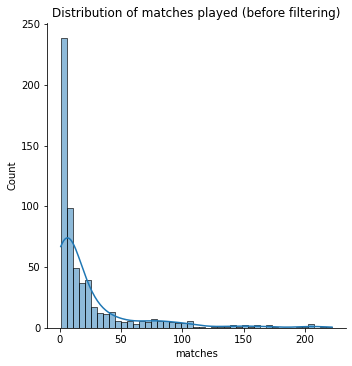

In [1004]:
sns.displot(players['matches'],kde=True)
plt.title('Distribution of matches played (before filtering)')
plt.show()

In [1005]:
players['matches'].describe()

count    608.000000
mean      23.851974
std       37.410292
min        1.000000
25%        3.000000
50%        8.000000
75%       24.000000
max      222.000000
Name: matches, dtype: float64

In [1006]:

# Filtering players who have played atleast 10 matches
CUTOFF_MATCHES = 10
players=players[players['matches']>=CUTOFF_MATCHES]

In [1007]:
players.shape

(285, 10)

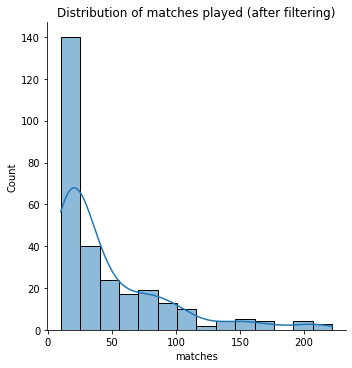

In [1008]:
sns.displot(players['matches'],kde=True)
plt.title('Distribution of matches played (after filtering)')
plt.show()

In [1009]:
players['matches'].describe()

count    285.000000
mean      46.585965
std       44.809186
min       10.000000
25%       17.000000
50%       26.000000
75%       67.000000
max      222.000000
Name: matches, dtype: float64

In [1010]:
player_data = players.copy()


In [1011]:
player_data.shape

(285, 10)

There are 2 types of outliers and we will treat outliers as it can skew our dataset¶
*   Statistical
*   Domain specific

Text(0.5, 0, 'Attributes')

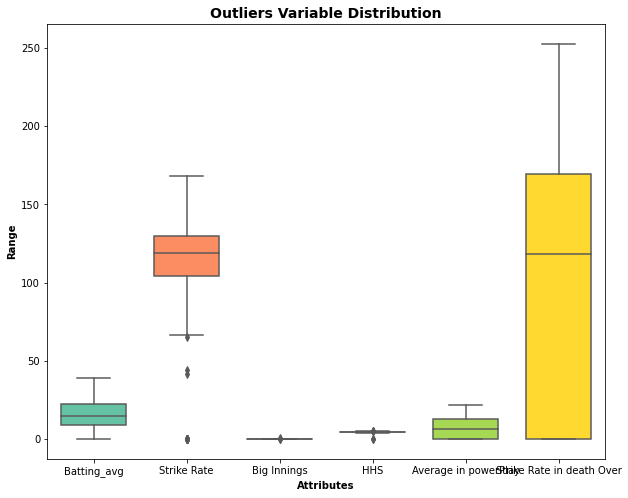

In [1012]:
# Outlier Analysis 

attributes = ['Batting_avg','Strike Rate','Big Innings','HHS','Average in powerPlay','Strike Rate in death Over']
plt.rcParams['figure.figsize'] = [10,8]
sns.boxplot(data = player_data[attributes], orient="v", palette="Set2" ,whis=1.5,saturation=1, width=0.7)
plt.title("Outliers Variable Distribution", fontsize = 14, fontweight = 'bold')
plt.ylabel("Range", fontweight = 'bold')
plt.xlabel("Attributes", fontweight = 'bold')

In [1013]:
# Removing (statistical) outliers 
Q1 = player_data.HHS.quantile(0.05)
Q3 = player_data.HHS.quantile(0.95)
IQR = Q3 - Q1
player_data = player_data[(player_data.HHS >= Q1 - 1.5*IQR) & (player_data.HHS <= Q3 + 1.5*IQR)]


Q1 = player_data["Strike Rate"].quantile(0.05)
Q3 = player_data["Strike Rate"].quantile(0.95)
IQR = Q3 - Q1
player_data = player_data[(player_data["Strike Rate"] >= Q1 - 1.5*IQR) & (player_data["Strike Rate"] <= Q3 + 1.5*IQR)]

Q1 = player_data["Big Innings"].quantile(0.05)
Q3 = player_data["Big Innings"].quantile(0.95)
IQR = Q3 - Q1
player_data = player_data[(player_data["Big Innings"] >= Q1 - 1.5*IQR) & (player_data["Big Innings"] <= Q3 + 1.5*IQR)]

Scale the data

In [1014]:
from sklearn.preprocessing import StandardScaler
# Standard Scaler (mean = 0 and standard deviation = 1)
scaler = StandardScaler()

sel_features = player_data[['Batting_avg','Strike Rate','Big Innings','HHS','Average in powerPlay','Strike Rate in death Over']]

# fit_transform
players_scaled = pd.DataFrame(scaler.fit_transform(sel_features),columns=sel_features.columns)
players_scaled.head(2)

,Batting_avg,Strike Rate,Big Innings,HHS,Average in powerPlay,Strike Rate in death Over
0,1.936342,0.477512,2.747376,-0.178411,1.470064,-1.095179
1,1.686644,0.471147,1.880214,-0.296226,1.577402,1.318764


Model Building

Hopkins' Test

Hopkins' statistic is a simple measure of clustering tendency. It is based on the difference between the distance from a real point to its nearest neighbor, U, and the distance from a randomly chosen point within thedata space to the nearest real data point, W.

Null hypothesis: the data set D is uniformly distributed (i.e., no meaningful clusters)
Alternative hypothesis: the data set D is not uniformly distributed (i.e., contains meaningful clusters)

We can conduct the Hopkins Statistic test iteratively, using 0.5 as the threshold to reject the alternative hypothesis. That is, if H < 0.5, then it is unlikely that D has statistically significant clusters.

Put in other words, If the value of Hopkins statistic is close to 1, then we can reject the null hypothesis and conclude that the dataset D is significantly a clusterable data.

In [1015]:
players_scaled.replace([np.inf, -np.inf], np.nan, inplace=True)
players_scaled = players_scaled.fillna(0)

In [1016]:
# Calculating Hopkins score to know whether the data is good for clustering or not.
from sklearn.neighbors import NearestNeighbors
from random import sample
from numpy.random import uniform
import numpy as np
from math import isnan


def hopkins(X):
  d = X.shape[1]
  #d = len(vars) # columns
  n = len(X) # rows
  m = int(0.1 * n)
  nbrs = NearestNeighbors(n_neighbors=1).fit(X.values)
 
  rand_X = sample(range(0, n, 1), m)
 
  ujd = []
  wjd = []
  for j in range(0, m):
     u_dist, _ = nbrs.kneighbors(uniform(np.amin(X,axis=0),np.amax(X,axis=0),d).reshape(1, -1), 2, return_distance=True)
     ujd.append(u_dist[0][1])
     w_dist, _ = nbrs.kneighbors(X.iloc[rand_X[j]].values.reshape(1, -1), 2, return_distance=True)
     wjd.append(w_dist[0][1])
 
  H = sum(ujd) / (sum(ujd) + sum(wjd))
  if isnan(H):
     print(ujd, wjd)
     H = 0
 
  return H

In [1017]:
hopkins(players_scaled)

0.821726647119197

0.85 is a good Hopkins score for Clustering.

K Means Clustering

Finding the Optimal Number of Clusters

Elbow Curve to get the right number of Clusters

In [1018]:
# sel_features.replace([np.inf, -np.inf], np.nan, inplace=True)
# df_drop = df_drop.fillna(0)

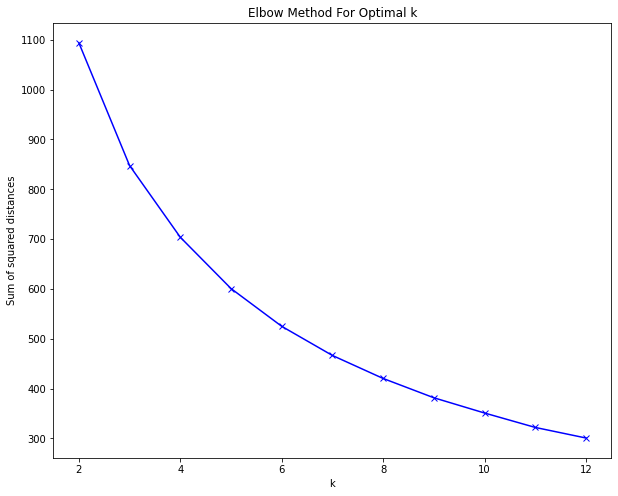

In [1019]:
# Elbow curve method to find the ideal number of clusters.
from sklearn.cluster import KMeans
def elbow_plot(min_k, max_k, k_max_iter):
    # Elbow-curve/sum of squared distances
    sum_squared_distances = []
    k_range = range(min_k, max_k+1)
    for k in k_range:
        kmeans = KMeans(n_clusters=k, max_iter=k_max_iter)
        kmeans.fit(players_scaled)
        sum_squared_distances.append(kmeans.inertia_)

    # Plot the score for each value of k
    plt.plot(k_range, sum_squared_distances, 'bx-')
    plt.xlabel('k')
    plt.ylabel('Sum of squared distances')
    plt.title('Elbow Method For Optimal k')
    plt.show()
    
elbow_plot(2,12, 50)

As seen here, a good value of k looks to be around 4 or 6

**Silhouette Method**

The silhouette value is a measure of how similar an object is to its own cluster (cohesion) compared to other clusters (separation).

silhouette score=(𝑝−𝑞)/𝑚𝑎𝑥(𝑝,𝑞)

𝑝 is the mean distance to the points in the nearest cluster that the data point is not a part of

𝑞 is the mean intra-cluster distance to all the points in its own cluster.

The value of the silhouette score range lies between -1 to 1.

A score closer to 1 indicates that the data point is very similar to other data points in the cluster,

A score closer to -1 indicates that the data point is not similar to the data points in its cluster.

In [1020]:
from sklearn.metrics import silhouette_score
silhouette_coefficients = []
# Method to compute the silhouette score for the given input
def compute_silhouette_score(input_df, min_k, max_k, k_max_iter):
    # silhouette analysis
    k_range = range(min_k, max_k+1)
    
    for k in k_range :
        # intialise kmeans
        kmeans = KMeans(n_clusters=k, max_iter=k_max_iter)
        kmeans.fit(input_df)
        cluster_labels = kmeans.labels_

        # silhouette score
        silhouette_avg = silhouette_score(input_df, cluster_labels)
        silhouette_coefficients.append(silhouette_avg)
        print(f"For k={k}, silhouette score = {silhouette_avg}")

In [1021]:
compute_silhouette_score(players_scaled, 2,12,300)

For k=2, silhouette score = 0.3155993214899124
For k=3, silhouette score = 0.2818830320531559
For k=4, silhouette score = 0.2900841325267791
For k=5, silhouette score = 0.29044797653299714
For k=6, silhouette score = 0.27834492275083716
For k=7, silhouette score = 0.3023130127301688
For k=8, silhouette score = 0.3169987617974174
For k=9, silhouette score = 0.30351294693422465
For k=10, silhouette score = 0.29522190116330105
For k=11, silhouette score = 0.30635922223102396
For k=12, silhouette score = 0.2849569499506405


Inference:

The optimal no. of clusters could be 4

In [1022]:
NUM_CLUSTERS = 5

K Means Clustering

In [1023]:
#K-means with k=5 clusters
cluster = KMeans(n_clusters=5, max_iter=150, random_state= 15)
cluster.fit(players_scaled)

KMeans(max_iter=150, n_clusters=5, random_state=15)

In [1024]:
# Cluster labels

cluster.labels_

array([0, 3, 3, 3, 3, 0, 3, 2, 2, 3, 2, 3, 4, 4, 0, 3, 2, 3, 3, 2, 2, 0,
       3, 3, 3, 1, 2, 2, 1, 2, 3, 2, 2, 3, 3, 0, 3, 3, 2, 2, 2, 1, 1, 3,
       2, 0, 0, 3, 0, 2, 2, 2, 2, 3, 3, 0, 2, 2, 1, 0, 3, 3, 1, 3, 2, 2,
       2, 1, 4, 3, 1, 4, 3, 1, 3, 3, 2, 2, 2, 1, 2, 2, 3, 2, 2, 4, 1, 3,
       2, 3, 1, 2, 1, 1, 2, 1, 1, 1, 3, 0, 2, 1, 0, 4, 2, 2, 1, 0, 4, 2,
       3, 1, 4, 3, 0, 1, 3, 2, 2, 0, 3, 2, 0, 1, 3, 1, 1, 1, 2, 1, 2, 1,
       1, 1, 0, 3, 0, 2, 2, 1, 2, 2, 1, 2, 0, 2, 1, 1, 3, 3, 2, 0, 2, 2,
       2, 3, 4, 1, 0, 2, 2, 2, 1, 1, 3, 3, 2, 2, 4, 0, 4, 1, 2, 1, 2, 1,
       2, 4, 1, 1, 2, 2, 3, 2, 1, 2, 2, 0, 3, 1, 1, 3, 1, 2, 0, 0, 2, 1,
       2, 3, 2, 2, 1, 1, 1, 2, 1, 1, 2, 4, 3, 1, 2, 3, 3, 3, 1, 3, 1, 0,
       1, 1, 2, 0, 2, 0, 1, 1, 2, 3, 1, 1, 3, 2, 1, 2, 3, 4, 0, 1, 1, 2,
       1, 1, 1, 0, 0, 1, 0, 2, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 0, 3, 2,
       2, 1, 0, 4, 1, 0, 1, 0, 4, 2, 0, 2, 1, 0, 1, 2, 2, 0, 1],
      dtype=int32)

In [1025]:
# Assign the label

player_data['Cluster_Id'] = cluster.labels_
player_data.head()

,batter,matches,Batting_avg,Runs,Strike Rate,HHS,Big Innings,Average in powerPlay,Strike Rate in death Over,Player_of_Match,Cluster_Id
0,RD Gaikwad,36.0,33.53,1207.0,127.724868,4.551282,0.305556,17.054054,0.000000,8.0,0
1,F du Plessis,108.0,31.28,3378.0,127.519819,4.517815,0.231481,17.760417,204.838710,7.0,3
2,RV Uthappa,197.0,25.15,4954.0,126.152279,4.549020,0.137056,15.872611,178.048780,7.0,3
3,MM Ali,42.0,21.67,910.0,139.570552,4.821705,0.119048,10.458333,175.925926,1.0,3
4,Shubman Gill,70.0,26.88,1855.0,122.685185,4.398268,0.202899,17.101695,135.714286,5.0,3


In [1026]:
clustered_Batsmen = player_data[player_data["Cluster_Id"] == 0]
clustered_Batsmen.head(2)

,batter,matches,Batting_avg,Runs,Strike Rate,HHS,Big Innings,Average in powerPlay,Strike Rate in death Over,Player_of_Match,Cluster_Id
0,RD Gaikwad,36.0,33.53,1207.0,127.724868,4.551282,0.305556,17.054054,0.0,8.0,0
5,VR Iyer,22.0,25.09,552.0,116.455696,4.560000,0.227273,17.217391,0.0,1.0,0


In [1027]:
import plotly.express as px
# df = px.data.tips()
clustered_Batsmen = player_data[player_data["Cluster_Id"] == 0]
clustered_Batsmen1 = player_data[player_data["Cluster_Id"] == 1]
clustered_Batsmen2 = player_data[player_data["Cluster_Id"] == 2]
clustered_Batsmen3 = player_data[player_data["Cluster_Id"] == 3]
clustered_Batsmen4 = player_data[player_data["Cluster_Id"] == 4]
# fig = px.scatter(x=clustered_Batsmen["Batting_avg"], y=clustered_Batsmen["Strike Rate"])
# fig.update_traces(marker=dict(
#         color='red'))

# fig.show()


trace1 =go.Scatter(
                    x = clustered_Batsmen["Batting_avg"],
                    y = clustered_Batsmen["Strike Rate"],
                    mode = "markers",
                    name = "Cluster 0",
                    marker = dict(color = 'rgba(51, 204, 51, 0.8)')
                    )

trace2 =go.Scatter(
                    x = clustered_Batsmen1["Batting_avg"],
                    y = clustered_Batsmen1["Strike Rate"],
                    mode = "markers",
                    name = "Cluster 1",
                    marker = dict(color = 'rgba(255, 0, 0, 0.8)')
                    )

trace3 =go.Scatter(
                    x = clustered_Batsmen2["Batting_avg"],
                    y = clustered_Batsmen2["Strike Rate"],
                    mode = "markers",
                    name = "Cluster 2",
                    marker = dict(color = 'rgba(0, 102, 255, 0.8)')
                    )

trace4 =go.Scatter(
                    x = clustered_Batsmen3["Batting_avg"],
                    y = clustered_Batsmen3["Strike Rate"],
                    mode = "markers",
                    name = "Cluster 3",
                    marker = dict(color = 'rgba(204, 204, 0, 0.8)')
                    )

trace5 =go.Scatter(
                    x = clustered_Batsmen4["Batting_avg"],
                    y = clustered_Batsmen4["Strike Rate"],
                    mode = "markers",
                    name = "Cluster 4",
                    marker = dict(color = 'rgba(255, 0, 255, 0.8)')
                    )


layout = dict(title = 'Scatter Plot',
              xaxis= dict(title= 'Batting_avg',ticklen= 5,zeroline= False),
              yaxis= dict(title= 'Strike Rate',ticklen= 5,zeroline= False),showlegend=True
             )
data = [trace1,trace2,trace3,trace4,trace5]
fig = dict(data = data, layout = layout)
iplot(fig)

In [1028]:
# Initialize few colour codes for each cluster
CLUSTER_COLORS = ['#F28A30','#0ABDA0','#008AC5','#D6618F','#F3CD05','#A882C1','#BDA589','#888C46',
                  '#36688D','#00743F','#0444BF','#A7414A','#1D65A6','red','green','blue','orange','pink','yellow']

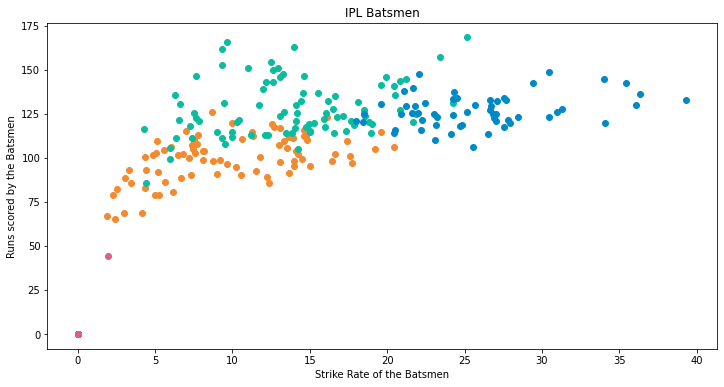

In [1029]:
fig = plt.figure(figsize=(12,6))

colors = CLUSTER_COLORS

# fig, ax = plt.subplots()
for r in range(1,6):
    clustered_Batsmen = player_data[player_data["Cluster_Id"] == r]
    plt.scatter(clustered_Batsmen["Batting_avg"], clustered_Batsmen["Strike Rate"], color=colors[r-1])


# ax.legend()   
plt.title("IPL Batsmen")
plt.xlabel("Strike Rate of the Batsmen")
plt.ylabel("Runs scored by the Batsmen")
plt.show()

It seems there are good number of players in each clusters.

From the business understanding we have learnt that Ave, SR,HHS,BII,APP,SDO are some important factors which decides the form of a player. Hence, we will proceed with analyzing these 6 components to build some meaningful clusters.

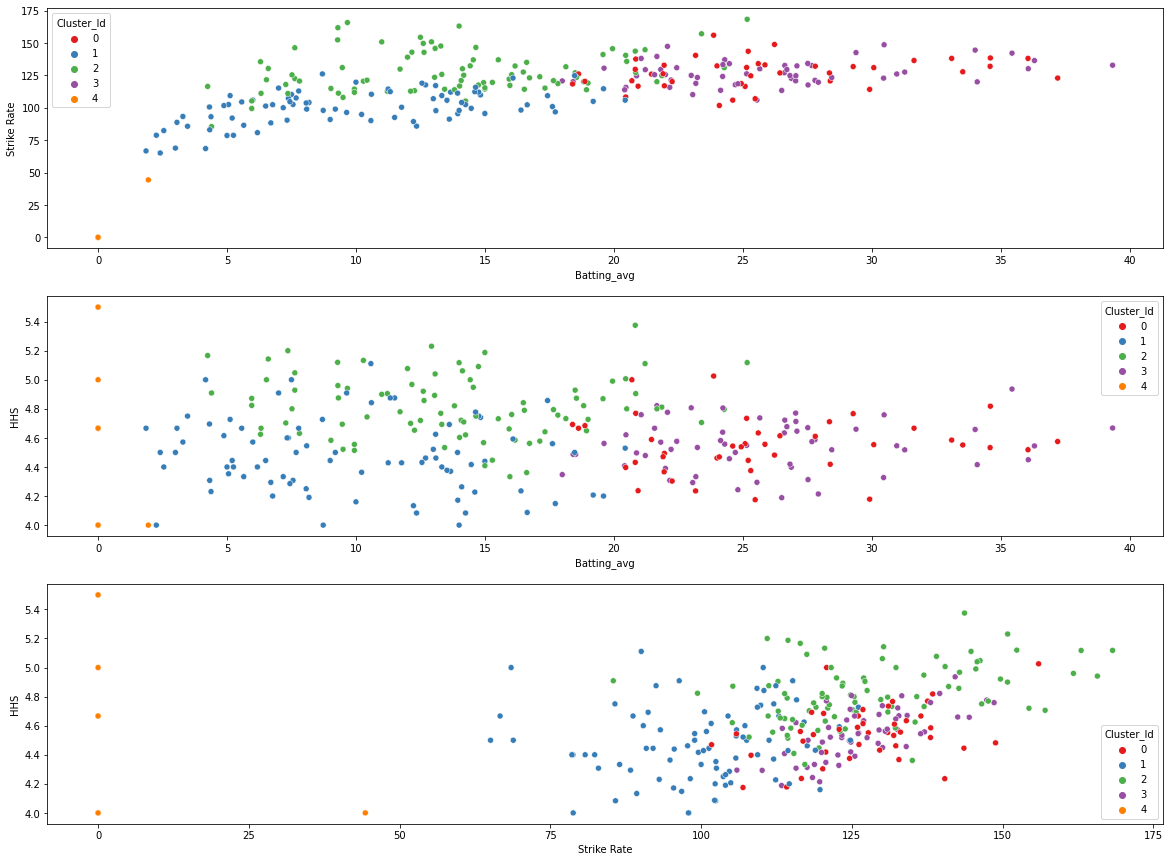

In [1030]:
# Scatter plot on Original attributes to visualize the spread of the data

plt.figure(figsize = (20,15))
plt.subplot(3,1,1)
sns.scatterplot(x = 'Batting_avg', y = 'Strike Rate',hue='Cluster_Id',data = player_data,legend='full',palette="Set1")
plt.subplot(3,1,2)
sns.scatterplot(x = 'Batting_avg', y = 'HHS',hue='Cluster_Id', data = player_data,legend='full',palette="Set1")
plt.subplot(3,1,3)
sns.scatterplot(x = 'Strike Rate', y = 'HHS',hue='Cluster_Id', data=player_data,legend='full',palette="Set1")
plt.show()

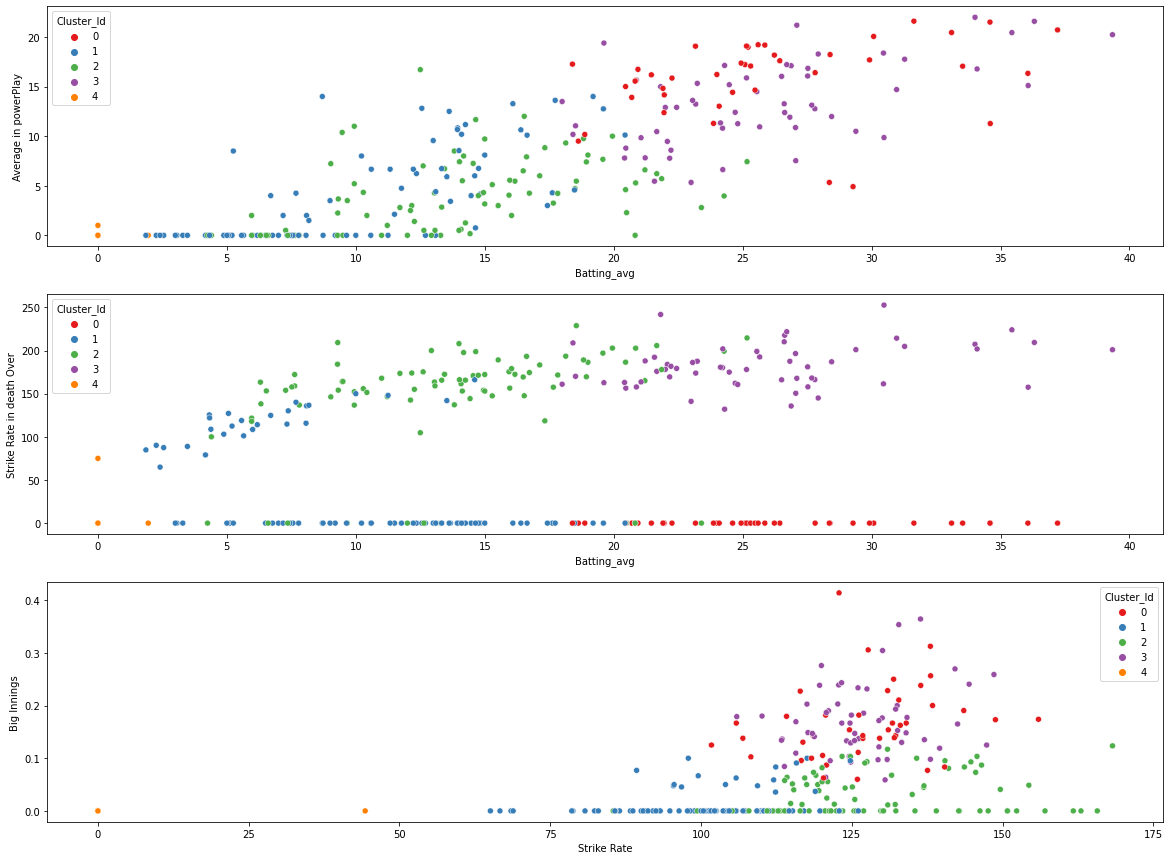

In [1031]:
plt.figure(figsize = (20,15))
plt.subplot(3,1,1)
sns.scatterplot(x = 'Batting_avg', y = 'Average in powerPlay',hue='Cluster_Id',data = player_data,legend='full',palette="Set1")
plt.subplot(3,1,2)
sns.scatterplot(x = 'Batting_avg', y = 'Strike Rate in death Over',hue='Cluster_Id', data = player_data,legend='full',palette="Set1")
plt.subplot(3,1,3)
sns.scatterplot(x = 'Strike Rate', y = 'Big Innings',hue='Cluster_Id', data=player_data,legend='full',palette="Set1")
plt.show()

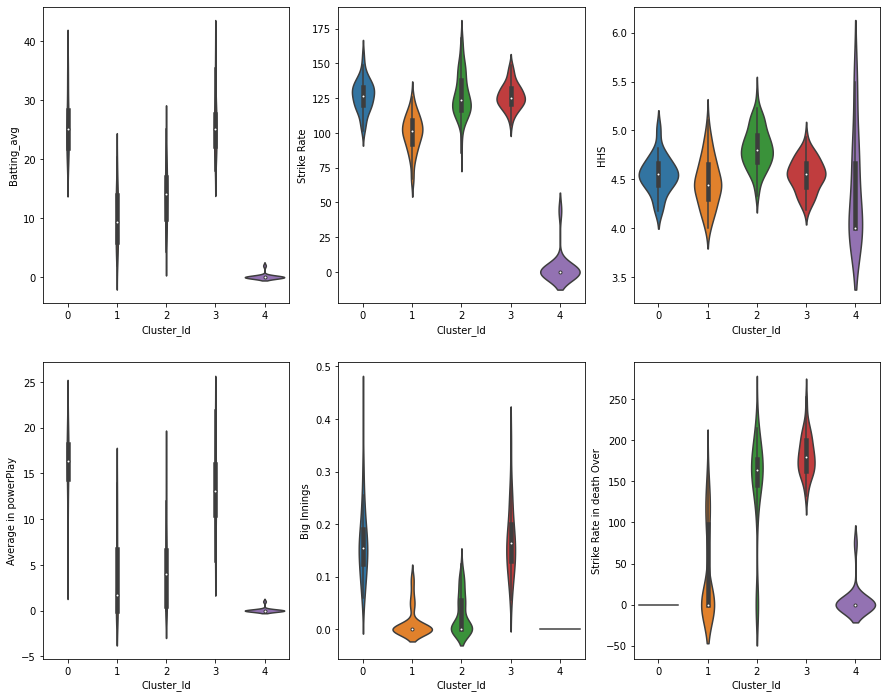

In [1032]:
 #Violin plot on Original attributes to visualize the spread of the data

fig, axes = plt.subplots(2,3, figsize=(15,12))

sns.violinplot(x = 'Cluster_Id', y = 'Batting_avg', data = player_data,ax=axes[0][0])
sns.violinplot(x = 'Cluster_Id', y = 'Strike Rate', data = player_data,ax=axes[0][1])
sns.violinplot(x = 'Cluster_Id', y = 'HHS', data=player_data,ax=axes[0][2])
sns.violinplot(x = 'Cluster_Id', y = 'Big Innings', data=player_data,ax=axes[1][1])
sns.violinplot(x = 'Cluster_Id', y = 'Average in powerPlay', data=player_data,ax=axes[1][0])
sns.violinplot(x = 'Cluster_Id', y = 'Strike Rate in death Over', data=player_data,ax=axes[1][2])
plt.show()

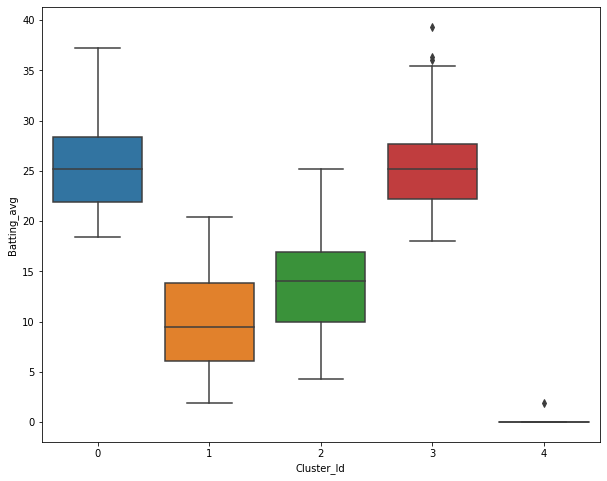

In [1033]:
sns.boxplot(x='Cluster_Id', y='Batting_avg', data=player_data)

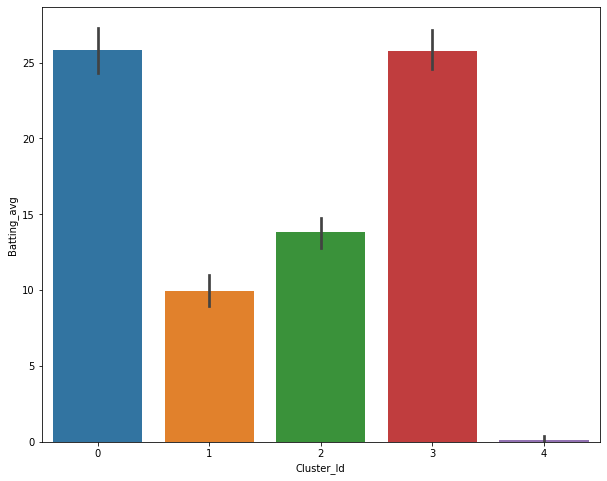

In [1034]:
sns.barplot(x='Cluster_Id', y='Batting_avg', data=player_data)

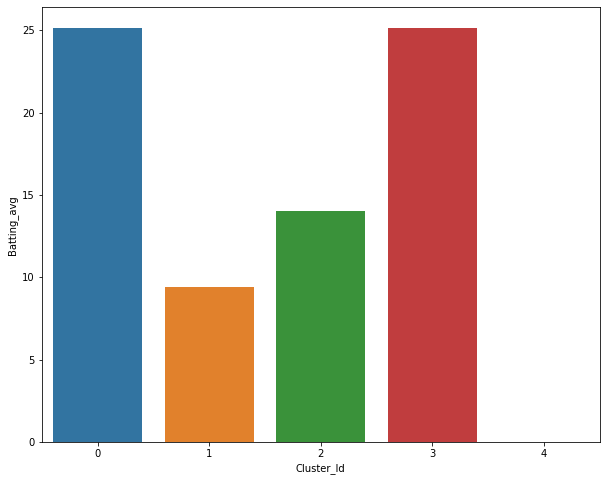

In [1035]:
sns.barplot(x='Cluster_Id', y='Batting_avg', data=player_data,estimator = np.median,ci=0)

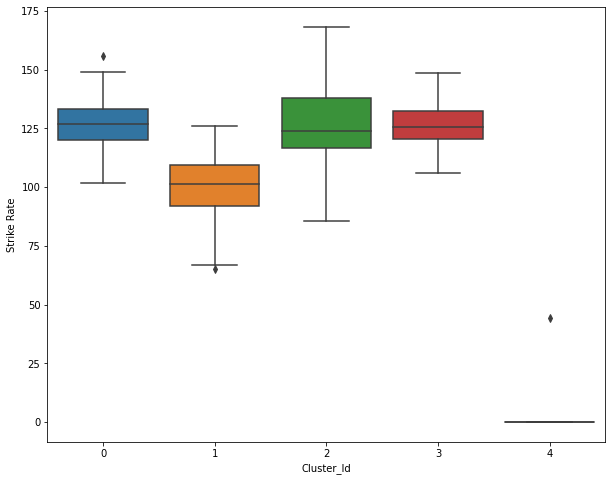

In [1036]:
sns.boxplot(x='Cluster_Id', y='Strike Rate', data=player_data)

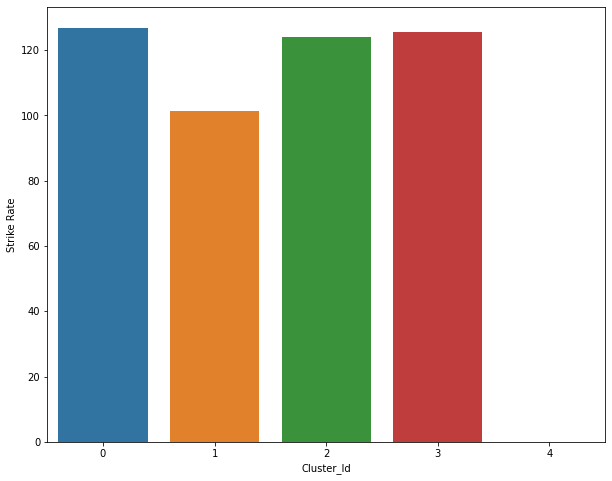

In [1037]:
sns.barplot(x='Cluster_Id', y='Strike Rate', data=player_data,estimator = np.median,ci=0)

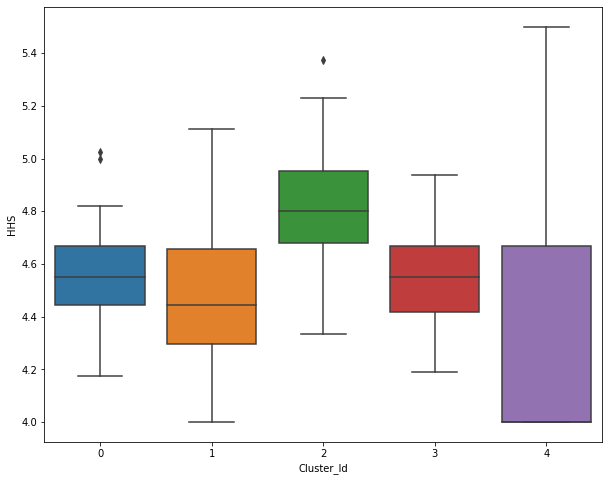

In [1038]:
sns.boxplot(x='Cluster_Id', y='HHS', data=player_data)

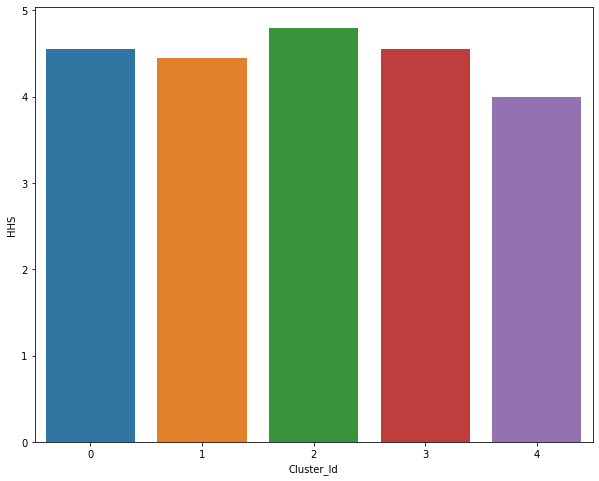

In [1039]:
sns.barplot(x='Cluster_Id', y='HHS', data=player_data,estimator = np.median,ci=0)

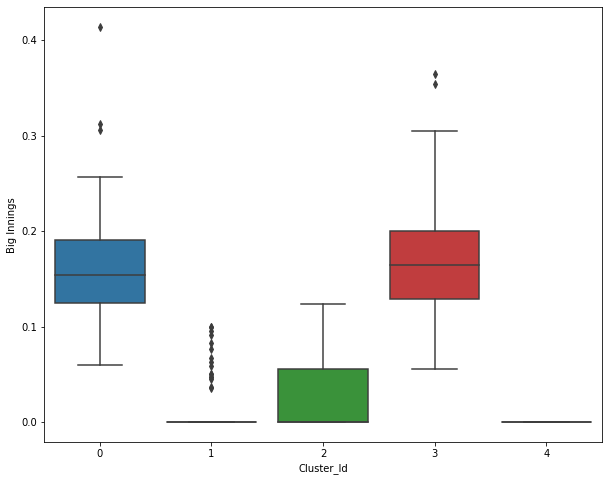

In [1040]:
sns.boxplot(x='Cluster_Id', y='Big Innings', data=player_data)

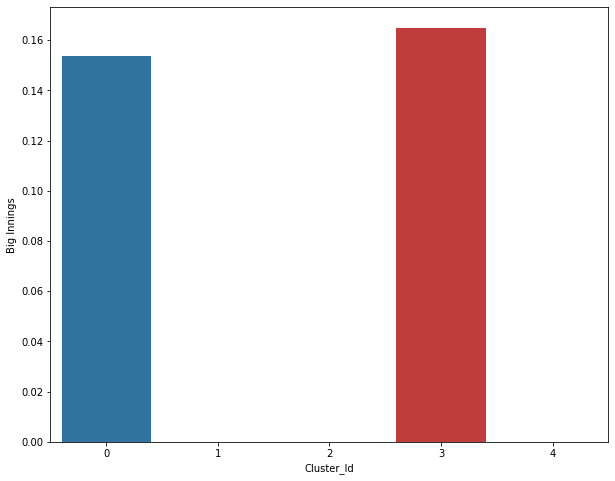

In [1041]:
sns.barplot(x='Cluster_Id', y='Big Innings', data=player_data,estimator = np.median,ci=0)

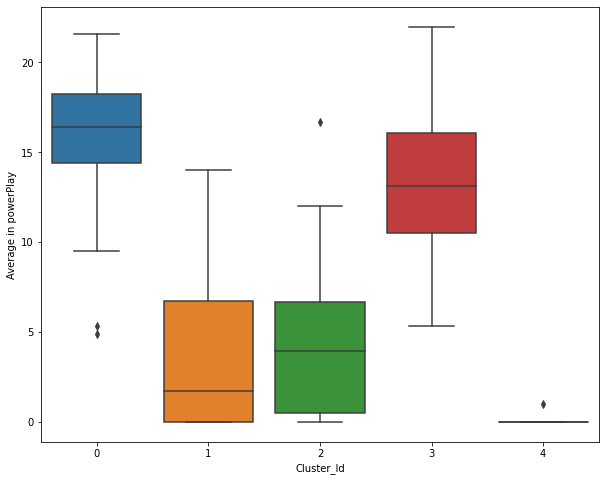

In [1042]:
sns.boxplot(x='Cluster_Id', y='Average in powerPlay', data=player_data)

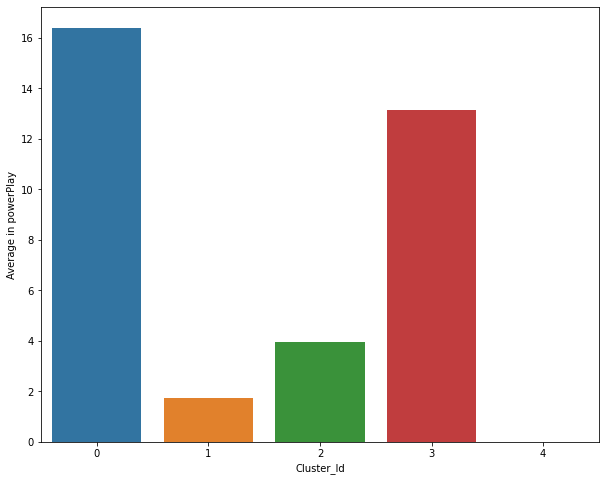

In [1043]:
sns.barplot(x='Cluster_Id', y='Average in powerPlay', data=player_data,estimator = np.median,ci=0)

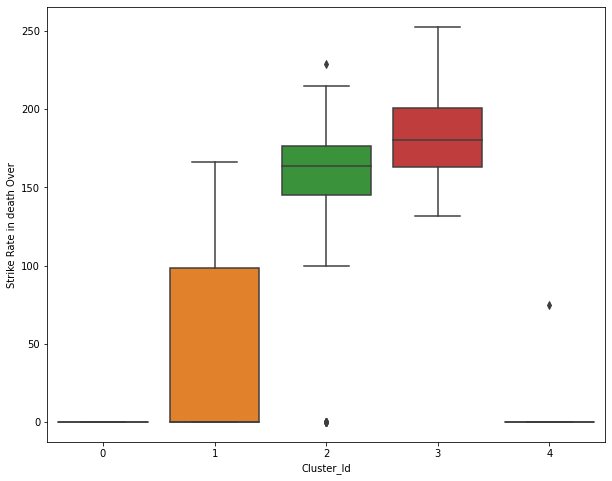

In [1044]:
sns.boxplot(x='Cluster_Id', y='Strike Rate in death Over', data=player_data)

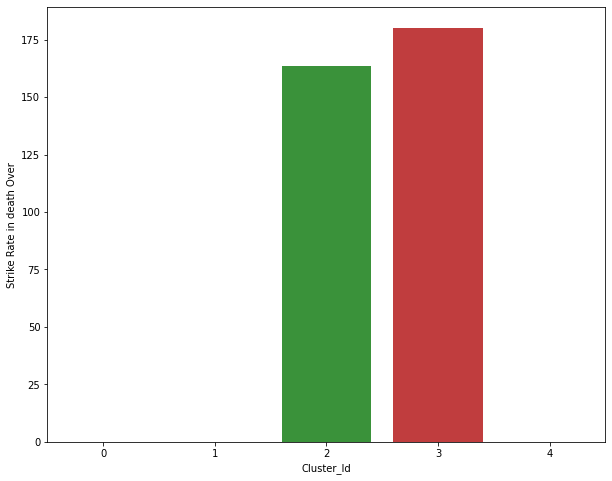

In [1045]:
sns.barplot(x='Cluster_Id', y='Strike Rate in death Over', data=player_data,estimator = np.median,ci=0)

In [1046]:
player_data[['Batting_avg','Strike Rate','Big Innings','HHS','Average in powerPlay','Strike Rate in death Over','Cluster_Id']].groupby('Cluster_Id').mean()

,Batting_avg,Strike Rate,Big Innings,HHS,Average in powerPlay,Strike Rate in death Over
Cluster_Id,,,,,,
0,25.825610,127.069703,0.166190,4.547277,15.882418,0.000000
1,9.976220,99.973611,0.012779,4.473608,3.825420,38.310142
2,13.814483,127.826146,0.029582,4.819245,4.123897,146.009088
3,25.797368,126.668527,0.168795,4.546318,13.401565,182.119779
4,0.121875,2.769886,0.000000,4.416667,0.062500,4.687500


Cluster Profiling

In [1047]:
player_data[['Batting_avg','Strike Rate','Big Innings','HHS','Average in powerPlay','Strike Rate in death Over','Cluster_Id']].groupby('Cluster_Id').mean()

,Batting_avg,Strike Rate,Big Innings,HHS,Average in powerPlay,Strike Rate in death Over
Cluster_Id,,,,,,
0,25.825610,127.069703,0.166190,4.547277,15.882418,0.000000
1,9.976220,99.973611,0.012779,4.473608,3.825420,38.310142
2,13.814483,127.826146,0.029582,4.819245,4.123897,146.009088
3,25.797368,126.668527,0.168795,4.546318,13.401565,182.119779
4,0.121875,2.769886,0.000000,4.416667,0.062500,4.687500


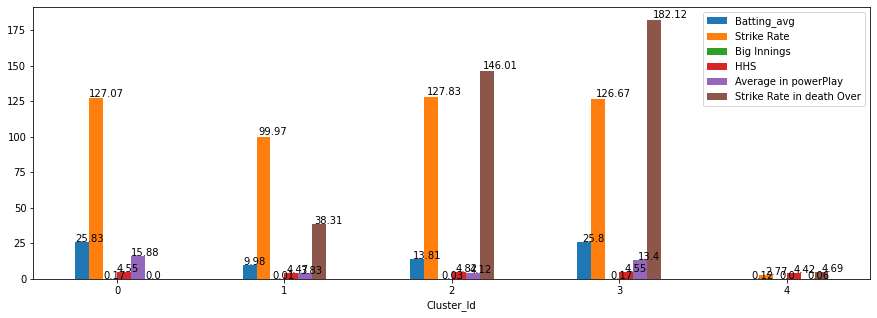

In [1048]:
ax=player_data[['Batting_avg','Strike Rate','Big Innings','HHS','Average in powerPlay','Strike Rate in death Over','Cluster_Id']].groupby('Cluster_Id').mean().plot(kind = 'bar',figsize = (15,5))

for p in ax.patches:
    ax.annotate(str(round(p.get_height(),2)), (p.get_x() * 1.01 , p.get_height() * 1.01))
plt.xticks(rotation=0)
plt.show();

In [1049]:
x1= player_data[player_data['Cluster_Id']==0].sort_values(by = ['Batting_avg','Strike Rate','Big Innings','HHS','Average in powerPlay','Strike Rate in death Over'], 
 ascending = [False,False,False,False,False,False])


In [1050]:
x2=player_data[player_data['Cluster_Id']==1].sort_values(by = ['Batting_avg','Strike Rate','Big Innings','HHS','Average in powerPlay','Strike Rate in death Over'], 
 ascending = [False,False,False,False,False,False]).head(3)
x2.head(2)

,batter,matches,Batting_avg,Runs,Strike Rate,HHS,Big Innings,Average in powerPlay,Strike Rate in death Over,Player_of_Match,Cluster_Id
394,JEC Franklin,16.0,20.44,327.0,105.825243,4.529412,0.0625,10.111111,0.0,1.0,1
534,SP Fleming,10.0,19.60,196.0,114.619883,4.200000,0.0000,12.750000,0.0,NaN,1


In [1051]:
x3=player_data[player_data['Cluster_Id']==2].sort_values(by = ['Batting_avg','Strike Rate','Big Innings','HHS','Average in powerPlay','Strike Rate in death Over'], 
 ascending = [False,False,False,False,False,False]).head(3)
x3.head(2)

,batter,matches,Batting_avg,Runs,Strike Rate,HHS,Big Innings,Average in powerPlay,Strike Rate in death Over,Player_of_Match,Cluster_Id
102,AD Russell,82.0,25.17,2039.0,168.234323,5.118211,0.123457,7.428571,214.634146,12.0,2
34,MS Dhoni,206.0,24.28,4978.0,130.931089,4.796522,0.117073,3.967742,199.312377,17.0,2


In [1052]:
x4=player_data[player_data['Cluster_Id']==3].sort_values(by = ['Batting_avg','Strike Rate','Big Innings','HHS','Average in powerPlay','Strike Rate in death Over'], 
 ascending = [False,False,False,False,False,False]).head(3)
x4.head(2)

,batter,matches,Batting_avg,Runs,Strike Rate,HHS,Big Innings,Average in powerPlay,Strike Rate in death Over,Player_of_Match,Cluster_Id
62,KL Rahul,100.0,39.34,3895.0,132.799182,4.668024,0.353535,20.228261,200.961538,12.0,3
89,DA Warner,162.0,36.31,5883.0,136.401577,4.544767,0.364198,21.579618,209.375000,18.0,3


In [1053]:
x5=player_data[player_data['Cluster_Id']==4].sort_values(by = ['Batting_avg','Strike Rate','Big Innings','HHS','Average in powerPlay','Strike Rate in death Over'], 
 ascending = [False,False,False,False,False,False]).head(3)
x5.head(2)

,batter,matches,Batting_avg,Runs,Strike Rate,HHS,Big Innings,Average in powerPlay,Strike Rate in death Over,Player_of_Match,Cluster_Id
147,S Nadeem,22.0,1.95,39.0,44.318182,4.0,0.0,0.0,0.0,2.0,4
128,DR Sams,13.0,0.00,44.0,0.000000,5.5,0.0,1.0,0.0,1.0,4


In [1054]:
def print_with_column_color_style(input_df):

    col_bgcolor_dict = dict(zip(input_df.columns,['background-color:'+i for i in CLUSTER_COLORS]))
    def mycolor(x):
        return pd.DataFrame(col_bgcolor_dict,index=x.index,columns=x.columns)

    return input_df.style.apply(mycolor,axis=None)

In [1055]:
# Get the summary of the players that falls in different clusters
def  clustering_summary(cluster_col):
 
    cluster_summary = pd.DataFrame(player_data[cluster_col].value_counts().sort_index())
    cluster_summary.columns = ['Num_Players']
    cluster_summary.insert(0, 'Cluster', cluster_summary.index)
    
    
    fig = plt.figure(figsize=(15,6))

    ax1 = fig.add_subplot(121)
    cluster_summary['Num_Players'].plot.pie(autopct="%1.1f%%",  colors = CLUSTER_COLORS)
    
    print("\n-----------------------\nPLAYERS CLUSTER SUMMARY\n-----------------------\n")
    
    # Plot summary table

    #display(cluster_summary)
    ax2 = fig.add_subplot(122)
    font_size=14
    bbox=[0, 0, 1, 1]
    ax2.axis('off')
    
    
    colors = []
    num_columns = len(cluster_summary.columns)
    num_rows = len(cluster_summary.index)
    for i in range(num_rows):
        colors.append([CLUSTER_COLORS[i]] * num_columns)

    summary_plot_table = ax2.table(cellText=cluster_summary.values,cellColours=colors,
                         colLabels=cluster_summary.columns,bbox=bbox,loc='center',cellLoc='center' )

    summary_plot_table.auto_set_font_size(False)
    summary_plot_table.set_fontsize(font_size)

    plt.show()


In [1056]:
# Get the summary of the clustering based on the cluster id 's
def  clustering_data(cluster_col):
    
    # Create column for each cluster and insert players in that cluster
    grouper = player_data.sort_values(['Batting_avg','Strike Rate','Big Innings','HHS','Average in powerPlay','Strike Rate in death Over'], ascending = False)[['batter',cluster_col]].groupby([cluster_col])
    cluster_df = pd.concat([pd.Series(v['batter'].tolist(), name=k) for k, v in grouper], axis=1)
    cluster_df.fillna('',inplace=True) 
    writer1 = pd.ExcelWriter('Playerlist.xlsx')
    cluster_df.to_excel(writer1) 
    # save the excel
    writer1.save()
    print("\n-----------------------\nPLAYERS IN EACH CLUSTER\n-----------------------\n")
    display(print_with_column_color_style(cluster_df))
    
    #return cluster_summary, cluster_df


-----------------------
PLAYERS CLUSTER SUMMARY
-----------------------



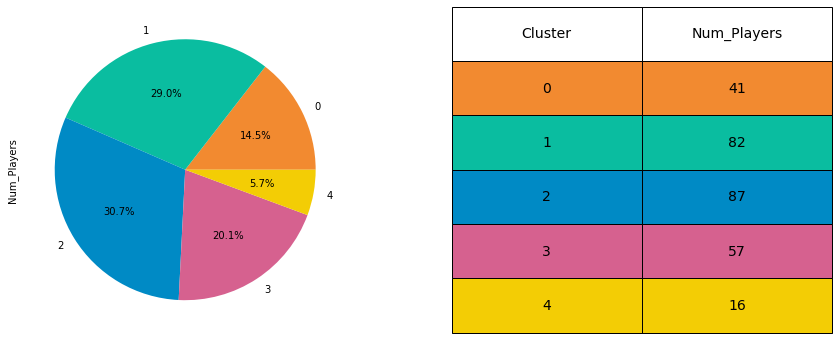

In [1057]:
kmeans_label = 'Cluster_Id'
# To view the summary of the clustering
clustering_summary(kmeans_label)

In [1058]:
clustering_data(kmeans_label)


-----------------------
PLAYERS IN EACH CLUSTER
-----------------------



,0,1,2,3,4
0,LMP Simmons,JEC Franklin,AD Russell,KL Rahul,S Nadeem
1,HM Amla,SP Fleming,MS Dhoni,DA Warner,DR Sams
2,RM Patidar,YV Takawale,JM Sharma,SE Marsh,DL Chahar
3,ML Hayden,Azhar Mahmood,Yuvraj Singh,CH Gayle,B Akhil
4,RD Gaikwad,CA Pujara,DJ Hussey,MEK Hussey,Shivam Mavi
5,JM Bairstow,Lalit Yadav,N Pooran,JC Buttler,TA Boult
6,CA Lynn,AL Menaria,S Dube,F du Plessis,M Ashwin
7,Q de Kock,FY Fazal,R Powell,V Kohli,L Balaji
8,SR Tendulkar,PA Reddy,TM Head,AB de Villiers,S Sreesanth
9,AK Markram,C Munro,KA Pollard,S Dhawan,CV Varun


Normalized KPI values Points= (No of Players – Rank according to that particular feature)/ No of players